In [1]:
%load_ext tensorboard
# Import our dependencies
import tensorflow as tf 
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
import datetime
import os 
import itertools
import matplotlib.pyplot as plt
from sklearn import metrics
from tensorflow import keras
import io 

#  Import and read the charity_data.csv.
import pandas as pd 
Confirmed_False_planets_df = pd.read_csv("confirmed_False_planets.csv")
Candidate_planets_df = pd.read_csv("Candidate_planets.csv")
Confirmed_False_planets_df.head()

,KOI_Name,Exoplanet_Archive_Disposition,Orbital_Period_[days],Transit_Epoch_[BKJD],Impact_Parameter,Transit_Duration_[hrs],Transit_Depth_[ppm],Planetary_Radius_[Earth_radii],Equilibrium_Temperature_[K],Insolation_Flux_[Earth_flux],Transit_Signal-to-Noise,Stellar_Effective_Temperature_[K],Stellar_Surface_Gravity_[log10(cm/s**2)],Stellar_Radius_[Solar_radii],RA_[decimal_degrees],Dec_[decimal_degrees],Kepler-band_[mag]
0,K00752.01,CONFIRMED,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,K00752.02,CONFIRMED,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,K00754.01,FALSE POSITIVE,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
3,K00755.01,CONFIRMED,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509
4,K00756.01,CONFIRMED,11.094321,171.201160,0.538,4.59450,1517.5,3.90,835.0,114.81,66.5,6046.0,4.486,0.972,296.28613,48.224670,15.714


In [2]:
Candidate_planets_df.head()

,KOI_Name,Exoplanet_Archive_Disposition,Orbital_Period_[days],Transit_Epoch_[BKJD],Impact_Parameter,Transit_Duration_[hrs],Transit_Depth_[ppm],Planetary_Radius_[Earth_radii],Equilibrium_Temperature_[K],Insolation_Flux_[Earth_flux],Transit_Signal-to-Noise,Stellar_Effective_Temperature_[K],Stellar_Surface_Gravity_[log10(cm/s**2)],Stellar_Radius_[Solar_radii],RA_[decimal_degrees],Dec_[decimal_degrees],Kepler-band_[mag]
0,K00753.01,CANDIDATE,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,5853.0,4.544,0.868,297.00482,48.134129,15.436
1,K00760.01,CANDIDATE,4.959319,172.258529,0.831,2.22739,9802.0,12.21,1103.0,349.40,696.5,5712.0,4.359,1.082,292.16705,48.727589,15.263
2,K00777.01,CANDIDATE,40.419504,173.564690,0.911,3.36200,6256.0,7.51,467.0,11.29,36.9,5446.0,4.507,0.781,294.31686,50.080231,15.487
3,K00780.02,CANDIDATE,7.240661,137.755450,1.198,0.55800,556.4,19.45,734.0,68.63,13.7,5005.0,4.595,0.765,293.83331,50.230350,15.334
4,K00115.03,CANDIDATE,3.435916,132.662400,0.624,3.13300,23.2,0.55,1272.0,617.61,8.7,5779.0,4.339,1.087,287.88733,46.276241,12.791


In [3]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
%reload_ext tensorboard

In [4]:
TensorBoard(
    log_dir="logs",
    histogram_freq=0,
    write_graph=True,
    write_images=False,
    update_freq="epoch",
    profile_batch=2,
    embeddings_freq=0,
    embeddings_metadata=None,
)

In [5]:
tensorboard_callback = TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_graph=True,
    write_images=False,
    update_freq="epoch",
)

In [6]:
Confirmed_False_planets_df=Confirmed_False_planets_df.set_index('KOI_Name')
Candidate_planets_df =Candidate_planets_df.set_index('KOI_Name')
Confirmed_False_planets_df

,Exoplanet_Archive_Disposition,Orbital_Period_[days],Transit_Epoch_[BKJD],Impact_Parameter,Transit_Duration_[hrs],Transit_Depth_[ppm],Planetary_Radius_[Earth_radii],Equilibrium_Temperature_[K],Insolation_Flux_[Earth_flux],Transit_Signal-to-Noise,Stellar_Effective_Temperature_[K],Stellar_Surface_Gravity_[log10(cm/s**2)],Stellar_Radius_[Solar_radii],RA_[decimal_degrees],Dec_[decimal_degrees],Kepler-band_[mag]
KOI_Name,,,,,,,,,,,,,,,,
K00752.01,CONFIRMED,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
K00752.02,CONFIRMED,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
K00754.01,FALSE POSITIVE,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
K00755.01,CONFIRMED,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509
K00756.01,CONFIRMED,11.094321,171.201160,0.538,4.59450,1517.5,3.90,835.0,114.81,66.5,6046.0,4.486,0.972,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K08198.01,FALSE POSITIVE,373.893980,261.496800,0.963,27.66000,730.0,2.51,206.0,0.42,18.5,5263.0,4.574,0.699,290.93597,47.290730,14.911
K07984.01,FALSE POSITIVE,8.589871,132.016100,0.765,4.80600,87.7,1.11,929.0,176.40,8.4,5638.0,4.296,1.088,298.74921,46.973351,14.478
K07985.01,FALSE POSITIVE,0.527699,131.705093,1.252,3.22210,1579.2,29.35,2088.0,4500.53,453.3,5638.0,4.529,0.903,297.18875,47.093819,14.082


In [7]:
planets_category = Confirmed_False_planets_df.dtypes[Confirmed_False_planets_df.dtypes == "object"].index.tolist()
planets_category

['Exoplanet_Archive_Disposition']

In [8]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(Confirmed_False_planets_df[planets_category]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(planets_category)
encode_df.index = Confirmed_False_planets_df.index
encode_df

,Exoplanet_Archive_Disposition_CONFIRMED,Exoplanet_Archive_Disposition_FALSE POSITIVE
KOI_Name,,
K00752.01,1.0,0.0
K00752.02,1.0,0.0
K00754.01,0.0,1.0
K00755.01,1.0,0.0
K00756.01,1.0,0.0
...,...,...
K08198.01,0.0,1.0
K07984.01,0.0,1.0
K07985.01,0.0,1.0


In [9]:
# Merge one-hot encoded features and drop the originals
new_planets_df = Confirmed_False_planets_df.merge(encode_df, left_index=True,right_index=True).drop(columns = planets_category)
new_planets_df

,Orbital_Period_[days],Transit_Epoch_[BKJD],Impact_Parameter,Transit_Duration_[hrs],Transit_Depth_[ppm],Planetary_Radius_[Earth_radii],Equilibrium_Temperature_[K],Insolation_Flux_[Earth_flux],Transit_Signal-to-Noise,Stellar_Effective_Temperature_[K],Stellar_Surface_Gravity_[log10(cm/s**2)],Stellar_Radius_[Solar_radii],RA_[decimal_degrees],Dec_[decimal_degrees],Kepler-band_[mag],Exoplanet_Archive_Disposition_CONFIRMED,Exoplanet_Archive_Disposition_FALSE POSITIVE
KOI_Name,,,,,,,,,,,,,,,,,
K00752.01,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347,1.0,0.0
K00752.02,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347,1.0,0.0
K00754.01,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597,0.0,1.0
K00755.01,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509,1.0,0.0
K00756.01,11.094321,171.201160,0.538,4.59450,1517.5,3.90,835.0,114.81,66.5,6046.0,4.486,0.972,296.28613,48.224670,15.714,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K08198.01,373.893980,261.496800,0.963,27.66000,730.0,2.51,206.0,0.42,18.5,5263.0,4.574,0.699,290.93597,47.290730,14.911,0.0,1.0
K07984.01,8.589871,132.016100,0.765,4.80600,87.7,1.11,929.0,176.40,8.4,5638.0,4.296,1.088,298.74921,46.973351,14.478,0.0,1.0
K07985.01,0.527699,131.705093,1.252,3.22210,1579.2,29.35,2088.0,4500.53,453.3,5638.0,4.529,0.903,297.18875,47.093819,14.082,0.0,1.0


In [10]:
# Determine the number of unique values in each column.
new_planets_df.nunique()

Orbital_Period_[days]                           7247
Transit_Epoch_[BKJD]                            7230
Impact_Parameter                                1980
Transit_Duration_[hrs]                          6473
Transit_Depth_[ppm]                             5999
Planetary_Radius_[Earth_radii]                  2782
Equilibrium_Temperature_[K]                     2427
Insolation_Flux_[Earth_flux]                    6419
Transit_Signal-to-Noise                         2642
Stellar_Effective_Temperature_[K]               2272
Stellar_Surface_Gravity_[log10(cm/s**2)]        1415
Stellar_Radius_[Solar_radii]                    2063
RA_[decimal_degrees]                            6347
Dec_[decimal_degrees]                           6379
Kepler-band_[mag]                               3485
Exoplanet_Archive_Disposition_CONFIRMED            2
Exoplanet_Archive_Disposition_FALSE POSITIVE       2
dtype: int64

In [11]:
#planets_value_counts = planets_df["TCE_Planet_Number"].value_counts()
#planets_value_counts

In [12]:
#planets_value_counts = planets_df["TCE_Delivery"].value_counts()
#planets_value_counts

In [13]:
new_planets_df = new_planets_df.drop(columns = ["Exoplanet_Archive_Disposition_FALSE POSITIVE"])
new_planets_df

,Orbital_Period_[days],Transit_Epoch_[BKJD],Impact_Parameter,Transit_Duration_[hrs],Transit_Depth_[ppm],Planetary_Radius_[Earth_radii],Equilibrium_Temperature_[K],Insolation_Flux_[Earth_flux],Transit_Signal-to-Noise,Stellar_Effective_Temperature_[K],Stellar_Surface_Gravity_[log10(cm/s**2)],Stellar_Radius_[Solar_radii],RA_[decimal_degrees],Dec_[decimal_degrees],Kepler-band_[mag],Exoplanet_Archive_Disposition_CONFIRMED
KOI_Name,,,,,,,,,,,,,,,,
K00752.01,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347,1.0
K00752.02,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347,1.0
K00754.01,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597,0.0
K00755.01,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509,1.0
K00756.01,11.094321,171.201160,0.538,4.59450,1517.5,3.90,835.0,114.81,66.5,6046.0,4.486,0.972,296.28613,48.224670,15.714,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K08198.01,373.893980,261.496800,0.963,27.66000,730.0,2.51,206.0,0.42,18.5,5263.0,4.574,0.699,290.93597,47.290730,14.911,0.0
K07984.01,8.589871,132.016100,0.765,4.80600,87.7,1.11,929.0,176.40,8.4,5638.0,4.296,1.088,298.74921,46.973351,14.478,0.0
K07985.01,0.527699,131.705093,1.252,3.22210,1579.2,29.35,2088.0,4500.53,453.3,5638.0,4.529,0.903,297.18875,47.093819,14.082,0.0


In [14]:
new_planets_df.Exoplanet_Archive_Disposition_CONFIRMED.value_counts()

0.0    4582
1.0    2665
Name: Exoplanet_Archive_Disposition_CONFIRMED, dtype: int64

In [15]:
# Split our preprocessed data into our features and target arrays
y = new_planets_df.Exoplanet_Archive_Disposition_CONFIRMED
X = new_planets_df.drop(columns= ["Exoplanet_Archive_Disposition_CONFIRMED"] )

# Split the preprocessed data into a training and testing dataset
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, random_state=42, stratify=y, test_size =0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, random_state=42,test_size =0.5 )

In [16]:
X_val_test

,Orbital_Period_[days],Transit_Epoch_[BKJD],Impact_Parameter,Transit_Duration_[hrs],Transit_Depth_[ppm],Planetary_Radius_[Earth_radii],Equilibrium_Temperature_[K],Insolation_Flux_[Earth_flux],Transit_Signal-to-Noise,Stellar_Effective_Temperature_[K],Stellar_Surface_Gravity_[log10(cm/s**2)],Stellar_Radius_[Solar_radii],RA_[decimal_degrees],Dec_[decimal_degrees],Kepler-band_[mag]
KOI_Name,,,,,,,,,,,,,,,
K01080.01,1.096583,133.614360,0.4210,2.11880,308.5,1.35,1474.0,1119.90,44.3,5222.0,4.528,0.763,297.78802,47.101070,14.867
K00959.01,12.713794,175.072568,0.4850,2.44093,36719.0,2.31,181.0,0.26,2981.3,2661.0,5.283,0.116,287.55972,46.957085,13.102
K06864.01,0.566790,131.818460,0.6376,4.00800,25.4,0.40,1984.0,3662.84,15.4,5799.0,4.600,0.758,291.70813,42.969410,13.767
K05151.01,26.153785,145.287900,0.2437,1.80200,228.6,1.47,631.0,37.53,6.2,6091.0,4.487,0.967,298.51175,40.459469,14.833
K02094.02,198.680859,270.665350,0.7460,8.28200,645.4,2.79,297.0,1.83,16.6,5330.0,4.366,1.013,295.66287,44.525841,15.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K01528.01,3.989544,134.098900,0.0850,1.59100,190.0,0.93,903.0,157.10,26.2,5229.0,4.643,0.688,294.64990,43.335590,14.083
K02205.01,24.086322,148.200860,0.8020,2.23600,1041.7,2.78,500.0,14.78,18.0,4973.0,4.537,0.768,281.69397,46.946449,15.464
K04211.02,0.696290,131.526760,1.1230,3.83900,120.5,12.63,1969.0,3537.89,19.4,5904.0,4.543,0.867,283.72379,40.237560,15.034


In [17]:
y_val_test

KOI_Name
K01080.01    0.0
K00959.01    0.0
K06864.01    0.0
K05151.01    0.0
K02094.02    1.0
            ... 
K01528.01    1.0
K02205.01    1.0
K04211.02    0.0
K00829.03    1.0
K06902.01    0.0
Name: Exoplanet_Archive_Disposition_CONFIRMED, Length: 1450, dtype: float64

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

classifier = make_pipeline(StandardScaler(), LinearSVC(random_state=42))
classifier.fit(X_train, y_train)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_val_scaled = X_scaler.transform(X_val)
X_test_scaled = X_scaler.transform(X_test)
X_val_test_scaled = X_scaler.transform(X_val_test)

C:\anaconda\envs\mlenv\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [19]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
#print("X_val_test shape: {}".format(X_val_test.shape))
#print("y_val_test shape: {}".format(y_val_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (5797, 15)
X_test shape: (725, 15)
y_train shape: (5797,)
y_test shape: (725,)
X_val shape: (725, 15)
y val shape: (725,)


In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 35

model = tf.keras.models.Sequential([

# First hidden layer
(
    tf.keras.layers.Dense(units=56, input_dim=number_input_features, activation="relu")
),

# Second hidden layer
(tf.keras.layers.Dense(units=16, activation="tanh")),
(tf.keras.layers.Dense(units=41, activation="tanh")),
(tf.keras.layers.Dense(units=46, activation="tanh")), 
(tf.keras.layers.Dense(units=46, activation="tanh")),  
(tf.keras.layers.Dense(units=16, activation="tanh")),      
# Output layer
(tf.keras.layers.Dense(units=1, activation="sigmoid"))])

# Check the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 56)                896       
                                                                 
 dense_1 (Dense)             (None, 16)                912       
                                                                 
 dense_2 (Dense)             (None, 41)                697       
                                                                 
 dense_3 (Dense)             (None, 46)                1932      
                                                                 
 dense_4 (Dense)             (None, 46)                2162      
                                                                 
 dense_5 (Dense)             (None, 16)                752       
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [21]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = model.fit(X_train_scaled, y_train, validation_data=(X_val, y_val) , epochs=150, callbacks=[tensorboard_callback])

Epoch 1/150
182/182 [==============================] - 2s 5ms/step - loss: 0.4293 - accuracy: 0.8008 - val_loss: 1.4588 - val_accuracy: 0.6152
Epoch 2/150
182/182 [==============================] - 1s 3ms/step - loss: 0.3468 - accuracy: 0.8525 - val_loss: 1.5824 - val_accuracy: 0.6152
Epoch 3/150
182/182 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.8596 - val_loss: 1.6508 - val_accuracy: 0.6152
Epoch 4/150
182/182 [==============================] - 1s 3ms/step - loss: 0.3051 - accuracy: 0.8701 - val_loss: 1.8112 - val_accuracy: 0.6152
Epoch 5/150
182/182 [==============================] - 1s 3ms/step - loss: 0.2951 - accuracy: 0.8775 - val_loss: 1.4877 - val_accuracy: 0.6152
Epoch 6/150
182/182 [==============================] - 1s 3ms/step - loss: 0.2876 - accuracy: 0.8810 - val_loss: 1.6384 - val_accuracy: 0.6152
Epoch 7/150
182/182 [==============================] - 0s 2ms/step - loss: 0.2778 - accuracy: 0.8820 - val_loss: 1.8439 - val_accuracy: 0.6152

Epoch 58/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1869 - accuracy: 0.9231 - val_loss: 2.5505 - val_accuracy: 0.6152
Epoch 59/150
182/182 [==============================] - 1s 3ms/step - loss: 0.1816 - accuracy: 0.9255 - val_loss: 2.7014 - val_accuracy: 0.6152
Epoch 60/150
182/182 [==============================] - 0s 3ms/step - loss: 0.1840 - accuracy: 0.9236 - val_loss: 2.7339 - val_accuracy: 0.6152
Epoch 61/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1811 - accuracy: 0.9248 - val_loss: 2.8371 - val_accuracy: 0.6152
Epoch 62/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1772 - accuracy: 0.9270 - val_loss: 2.8935 - val_accuracy: 0.6152
Epoch 63/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.9179 - val_loss: 2.9197 - val_accuracy: 0.6152
Epoch 64/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1839 - accuracy: 0.9232 - val_loss: 2.3898 - val_accuracy:

Epoch 115/150
182/182 [==============================] - 1s 3ms/step - loss: 0.1419 - accuracy: 0.9384 - val_loss: 3.4322 - val_accuracy: 0.6152
Epoch 116/150
182/182 [==============================] - 0s 3ms/step - loss: 0.1335 - accuracy: 0.9432 - val_loss: 3.4092 - val_accuracy: 0.6152
Epoch 117/150
182/182 [==============================] - 1s 3ms/step - loss: 0.1419 - accuracy: 0.9396 - val_loss: 2.9740 - val_accuracy: 0.6152
Epoch 118/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1389 - accuracy: 0.9419 - val_loss: 3.0639 - val_accuracy: 0.6152
Epoch 119/150
182/182 [==============================] - 1s 3ms/step - loss: 0.1331 - accuracy: 0.9426 - val_loss: 3.2334 - val_accuracy: 0.6152
Epoch 120/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1496 - accuracy: 0.9381 - val_loss: 1.9261 - val_accuracy: 0.6152
Epoch 121/150
182/182 [==============================] - 1s 4ms/step - loss: 0.1381 - accuracy: 0.9405 - val_loss: 2.3604 - val_ac

In [22]:
#tensorboard --logdir logs/image/cm/

In [23]:
tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 11876), started 3 days, 8:17:51 ago. (Use '!kill 11876' to kill it.)

In [24]:
model_loss, model_accuracy = model.evaluate(X_val_scaled,y_val,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

23/23 - 0s - loss: 0.4483 - accuracy: 0.8841 - 151ms/epoch - 7ms/step
Loss: 0.4483008086681366, Accuracy: 0.8841379284858704


In [25]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_proba = model.predict(X_test_scaled)
#cm = confusion_matrix(y_true, y_proba)
#cm
y_proba

array([[2.69174576e-03],
       [9.95900452e-01],
       [4.42549135e-05],
       [9.29070532e-01],
       [9.99630809e-01],
       [9.99451637e-01],
       [9.98098135e-01],
       [2.12577581e-02],
       [1.02457404e-03],
       [9.95543659e-01],
       [1.25855118e-01],
       [9.87052917e-04],
       [9.99886930e-01],
       [9.96861994e-01],
       [6.58087083e-05],
       [6.09140880e-05],
       [7.50089675e-05],
       [3.44842672e-04],
       [6.72515234e-05],
       [9.99004722e-01],
       [1.56179070e-03],
       [4.23009276e-01],
       [3.03626060e-04],
       [6.15627587e-01],
       [1.32679939e-04],
       [9.99940991e-01],
       [7.28809595e-01],
       [9.99581933e-01],
       [9.99696255e-01],
       [1.14715099e-03],
       [2.61316299e-02],
       [3.62670571e-01],
       [9.24676657e-04],
       [9.94892240e-01],
       [2.61817640e-05],
       [9.89908934e-01],
       [9.94687557e-01],
       [2.01949477e-03],
       [9.99933600e-01],
       [8.06478129e-05],


In [26]:
y_pred = (y_proba>0.5).astype(int)
#compute accuracy pred and proba 
#check just val 
y_pred

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
    

In [27]:

y_true

KOI_Name
K00109.01    0.0
K00116.02    1.0
K04736.01    0.0
K01978.01    1.0
K00767.01    1.0
            ... 
K01008.01    0.0
K05442.01    0.0
K04646.01    0.0
K07779.01    0.0
K03228.01    0.0
Name: Exoplanet_Archive_Disposition_CONFIRMED, Length: 725, dtype: float64

In [28]:
true_df = y_true.to_frame("true")
true_df

,true
KOI_Name,
K00109.01,0.0
K00116.02,1.0
K04736.01,0.0
K01978.01,1.0
K00767.01,1.0
...,...
K01008.01,0.0
K05442.01,0.0
K04646.01,0.0


In [29]:
proba_df = pd.DataFrame(y_proba,columns=["Probably"]).set_index(y_true.index)
proba_df

,Probably
KOI_Name,
K00109.01,0.002692
K00116.02,0.995900
K04736.01,0.000044
K01978.01,0.929071
K00767.01,0.999631
...,...
K01008.01,0.000173
K05442.01,0.437558
K04646.01,0.085383


In [30]:
y_pred_df = pd.DataFrame(y_pred,columns=["Predictions"]).set_index(y_true.index)
y_pred_df

,Predictions
KOI_Name,
K00109.01,0
K00116.02,1
K04736.01,0
K01978.01,1
K00767.01,1
...,...
K01008.01,0
K05442.01,0
K04646.01,0


In [31]:
pred_prob_df = proba_df.merge(y_pred_df, left_index=True,right_index=True)
pred_prob_df

,Probably,Predictions
KOI_Name,,
K00109.01,0.002692,0
K00116.02,0.995900,1
K04736.01,0.000044,0
K01978.01,0.929071,1
K00767.01,0.999631,1
...,...,...
K01008.01,0.000173,0
K05442.01,0.437558,0
K04646.01,0.085383,0


In [32]:
true_pred_prob_df = true_df.merge(pred_prob_df, left_index=True,right_index=True)
true_pred_prob_df

,true,Probably,Predictions
KOI_Name,,,
K00109.01,0.0,0.002692,0
K00116.02,1.0,0.995900,1
K04736.01,0.0,0.000044,0
K01978.01,1.0,0.929071,1
K00767.01,1.0,0.999631,1
...,...,...,...
K01008.01,0.0,0.000173,0
K05442.01,0.0,0.437558,0
K04646.01,0.0,0.085383,0


In [33]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[423,  48],
       [ 35, 219]], dtype=int64)

In [34]:
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,423,48
Actual 1,35,219


In [35]:
history_df = pd.DataFrame(fit_model.history)
history_df.index +=1

history_df

,loss,accuracy,val_loss,val_accuracy
1,0.429282,0.800759,1.458779,0.615172
2,0.346835,0.852510,1.582425,0.615172
3,0.322810,0.859583,1.650844,0.615172
4,0.305100,0.870105,1.811196,0.615172
5,0.295063,0.877523,1.487724,0.615172
...,...,...,...,...
146,0.106965,0.956012,3.366293,0.615172
147,0.119575,0.947214,3.105915,0.615172
148,0.117015,0.947904,3.267355,0.615172
149,0.118699,0.947559,2.913130,0.588966


<AxesSubplot:>

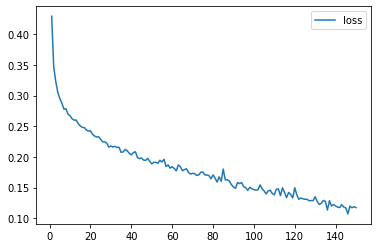

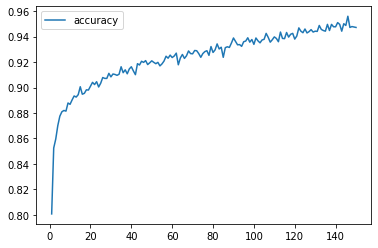

In [51]:
history_df.plot(y="loss")
history_df.plot(y="accuracy")

In [37]:
# Create a flattened one-dimensional array of tn, fp, fn, tp with ravel()
tn, fp, fn, tp = cm.ravel()

In [38]:
tn, fp, fn, tp

(423, 48, 35, 219)

In [39]:
# Calculate the precision of the model based on the confusion matrix
precision = tp / (tp + fp)
precision

0.8202247191011236

In [40]:
# Calculate the sensitivity of the model based on the confusion matrix
sensitivity = tp / (tp + fn)
sensitivity

0.8622047244094488

In [41]:
f1 = 2*precision*sensitivity / (precision + sensitivity)
f1

0.8406909788867563

In [42]:
 print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       471
         1.0       0.82      0.86      0.84       254

    accuracy                           0.89       725
   macro avg       0.87      0.88      0.88       725
weighted avg       0.89      0.89      0.89       725



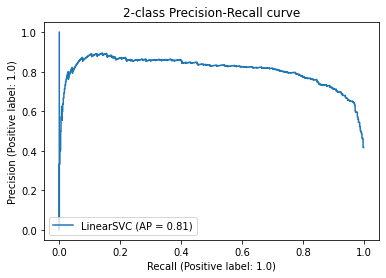

In [43]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier, X_val_test, y_val_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [44]:
records = encode_df.to_records(index=False)

In [45]:
result = list(records)
result

[(1., 0.),
 (1., 0.),
 (0., 1.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (0., 1.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (0., 1.),
 (0., 1.),
 (0., 1.),
 (0., 1.),
 (1., 0.),
 (1., 0.),
 (0., 1.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (0., 1.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (0., 1.),
 (0., 1.),
 (0., 1.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (0., 1.),
 (1., 0.),
 (0., 1.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (0., 1.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (0., 1.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (0., 1.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (0., 1.),
 (0., 1.),
 (1., 0.),
 (1., 0.),
 (0., 1.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (0., 1.),
 (0., 1.),
 (1., 0.),
 (1., 0.),
 (0., 1.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (1., 0.),
 (0., 1.),
 (1., 0.),
 (0., 1.),
 (1., 0.),
 (1., 0.),

In [46]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score


In [47]:
# Learn to predict each class against the other
classifier_ROC = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=42)
)
y_score = classifier_ROC.fit(X_train, y_train).decision_function(X_test)


In [52]:
def plot_roc(y_test, y_score):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
    plt.figure()
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

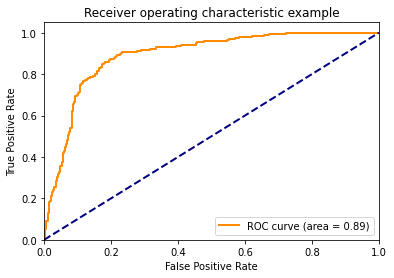

In [53]:
plot_roc(y_test, y_score)